In [1]:
!pip install prophet


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from prophet import Prophet
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error #Mesure de precision


In [10]:
df=pd.read_csv('/content/date_6.csv')
print(df.head)

<bound method NDFrame.head of                   date       val
0     01/01/1990 00:00  0.525486
1     01/02/1990 00:00  0.523972
2     01/03/1990 00:00  0.526316
3     01/04/1990 00:00  0.523834
4     01/05/1990 00:00  0.527426
...                ...       ...
7483  06/28/2010 00:00  0.730941
7484  06/29/2010 00:00  0.734498
7485  06/30/2010 00:00  0.733708
7486  07/01/2010 00:00  0.736223
7487  07/02/2010 00:00  0.737300

[7488 rows x 2 columns]>


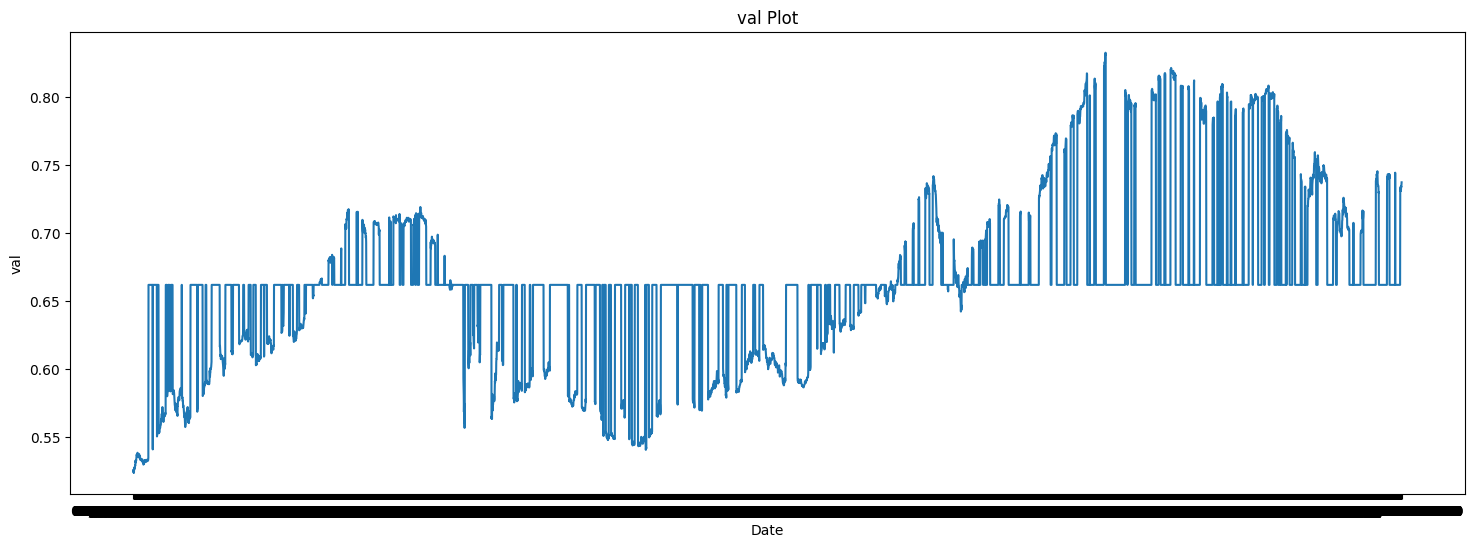

In [11]:
# Create the plot of the Feature OT

plt.figure(figsize=(18, 6))  # width and height
plt.plot(df['date'], df['val'], )

plt.xlabel("Date")
plt.ylabel("val")
plt.title("val Plot")

# Show the plot
plt.show()

In [13]:
print(df.head)

new_column_names = {'date': 'ds', 'val': 'y'}
df2 = df.rename(columns=new_column_names)
print(df2)

<bound method NDFrame.head of                   date       val
0     01/01/1990 00:00  0.525486
1     01/02/1990 00:00  0.523972
2     01/03/1990 00:00  0.526316
3     01/04/1990 00:00  0.523834
4     01/05/1990 00:00  0.527426
...                ...       ...
7483  06/28/2010 00:00  0.730941
7484  06/29/2010 00:00  0.734498
7485  06/30/2010 00:00  0.733708
7486  07/01/2010 00:00  0.736223
7487  07/02/2010 00:00  0.737300

[7488 rows x 2 columns]>
                    ds         y
0     01/01/1990 00:00  0.525486
1     01/02/1990 00:00  0.523972
2     01/03/1990 00:00  0.526316
3     01/04/1990 00:00  0.523834
4     01/05/1990 00:00  0.527426
...                ...       ...
7483  06/28/2010 00:00  0.730941
7484  06/29/2010 00:00  0.734498
7485  06/30/2010 00:00  0.733708
7486  07/01/2010 00:00  0.736223
7487  07/02/2010 00:00  0.737300

[7488 rows x 2 columns]


In [14]:
# Select relevant columns for Prophet
df_prophet = df2[['ds', 'y']]

# Split data into training and testing sets
train_size = int(len(df_prophet) * 0.8)
train, test = df_prophet[:train_size], df_prophet[train_size:]

#Display Train and Test
print('Train', train.shape)
print('Test', test.shape)

# Create Prophet model
model = Prophet()

'''
# Fit the model on the training data (if using a train-test split)
if train_size < len(df_prophet):
    model.fit(train)
else:
  '''
model.fit(df_prophet)  # Fit on all data if no split


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_3pmuq48/a56x45u6.json


Train (5990, 2)
Test (1498, 2)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_3pmuq48/dhzlxsj3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54896', 'data', 'file=/tmp/tmp_3pmuq48/a56x45u6.json', 'init=/tmp/tmp_3pmuq48/dhzlxsj3.json', 'output', 'file=/tmp/tmp_3pmuq48/prophet_modelbf0wbrjo/prophet_model-20240416200728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:07:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:07:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [15]:
test_forecast= model.predict(test)
print(test_forecast.head)

<bound method NDFrame.head of              ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2006-05-27  0.710946    0.660064    0.762104     0.710946     0.710946   
1    2006-05-28  0.710934    0.657223    0.759652     0.710934     0.710934   
2    2006-05-29  0.710922    0.657572    0.760613     0.710922     0.710922   
3    2006-05-30  0.710910    0.656746    0.760713     0.710910     0.710910   
4    2006-05-31  0.710898    0.655902    0.759767     0.710898     0.710898   
...         ...       ...         ...         ...          ...          ...   
1493 2010-06-28  0.692899    0.644310    0.749665     0.692899     0.692899   
1494 2010-06-29  0.692887    0.644438    0.746093     0.692887     0.692887   
1495 2010-06-30  0.692875    0.642018    0.742739     0.692875     0.692875   
1496 2010-07-01  0.692863    0.645965    0.749452     0.692863     0.692863   
1497 2010-07-02  0.692851    0.646584    0.750886     0.692851     0.692851   

      additive_terms 

In [16]:
# Define the forecast horizon (number of future values to predict)
future = model.make_future_dataframe(periods=100, freq='H')  # 100 values

print(future.tail())

# Make predictions
forecast = model.predict(future)
forecast=forecast[['yhat']]*0.53
forecast[['yhat']].tail(100)


# 'yhat': This is the column containing the predicted values for the time series variable.
# 'yhat_lower': This is the column containing the lower bound of the prediction interval (uncertainty estimate).
# 'yhat_upper': This is the column containing the upper bound of the prediction interval (uncertainty estimate).

#Convergence function(Quadratic)

# Extract yhat values from forecast DataFrame
yhat_values = forecast['yhat'].values

# Create x values corresponding to the indices of the array
x_values = np.arange(len(yhat_values))

# Fit a quadratic function to the data
coefficients = np.polyfit(x_values, yhat_values, 2)
a, b, c = coefficients

# Generate y values using the quadratic function
y_values =3* a * x_values ** 2 + 2*b * x_values + c

# Assign the generated y values back to the 'yhat' column in the forecast DataFrame
forecast1= y_values

# Print the modified forecast DataFrame
predicted=forecast[['yhat']].tail(100)

predicted.to_csv("predictions_quadratic.csv", index=False)
forecast.to_csv("predictions.csv", index=False)


x_values = np.arange(len(predicted))

# Fit a quadratic function to the data
coefficients = np.polyfit(x_values, predicted, 2)
a, b, c = coefficients

# Generate y values using the quadratic function
y_values = -4*a * x_values ** 2 + 2*b * x_values + c

yhat_adjusted= y_values

print(yhat_adjusted)




                      ds
7583 2010-07-06 00:00:00
7584 2010-07-06 01:00:00
7585 2010-07-06 02:00:00
7586 2010-07-06 03:00:00
7587 2010-07-06 04:00:00
[0.36913625 0.36912069 0.36910492 0.36908895 0.36907277 0.3690564
 0.36903982 0.36902304 0.36900605 0.36898886 0.36897147 0.36895388
 0.36893608 0.36891808 0.36889987 0.36888147 0.36886286 0.36884405
 0.36882503 0.36880581 0.36878639 0.36876677 0.36874694 0.36872691
 0.36870668 0.36868624 0.3686656  0.36864476 0.36862372 0.36860247
 0.36858102 0.36855936 0.36853751 0.36851545 0.36849318 0.36847072
 0.36844805 0.36842518 0.3684021  0.36837882 0.36835534 0.36833166
 0.36830777 0.36828368 0.36825939 0.3682349  0.3682102  0.3681853
 0.36816019 0.36813488 0.36810937 0.36808366 0.36805774 0.36803162
 0.3680053  0.36797878 0.36795205 0.36792512 0.36789798 0.36787064
 0.3678431  0.36781536 0.36778741 0.36775927 0.36773091 0.36770236
 0.3676736  0.36764464 0.36761548 0.36758611 0.36755654 0.36752677
 0.36749679 0.36746661 0.36743623 0.36740564 0.3

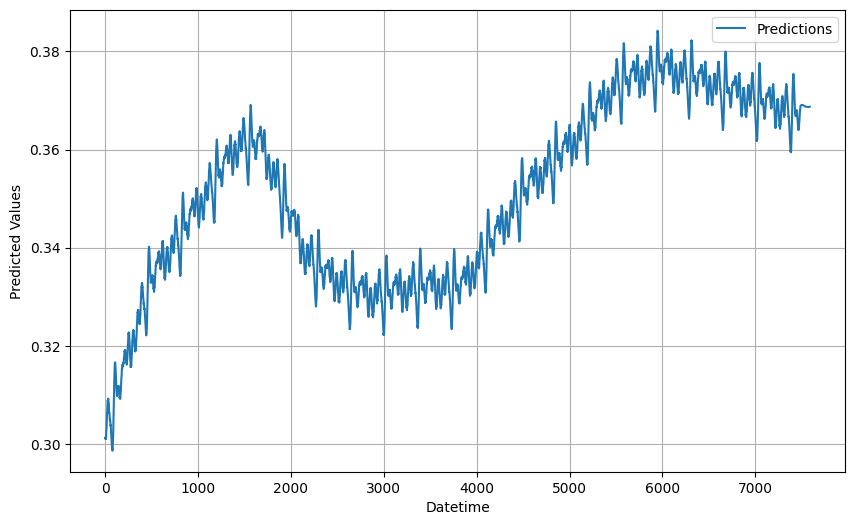

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(forecast, label='Predictions')  # Label for scaled predictions
plt.xlabel('Datetime')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Customize the plot further as needed (e.g., axis limits, markers, etc.)

# Display the plot
plt.show()


In [18]:
predictions=forecast.iloc[-100:]['yhat']
y_true = test['y']  # Assuming 'y' is the actual values in the test set
y_pred=forecast['yhat'] # Predicted values
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)



ValueError: Found input variables with inconsistent numbers of samples: [1498, 7588]